# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?id=524901&units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("-----------------------------")
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margate
Processing Record 2 of Set 1 | russell
Processing Record 3 of Set 1 | shellbrook
Processing Record 4 of Set 1 | krasnoarmeysk
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | lanivtsi
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | los llanos de aridane
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | cayenne
Processing Record 13 of Set 1 | husavik
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | sinaloa
Processing Record 19 of Set 1 | okhotsk
Processing Record 20 of Set 1 | valle de allende
Processing Record 21 of Set 1 | balykshi
Processing Record 22 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margate,51.3813,1.3862,6.06,84,3,0.89,GB,1675725866
1,russell,32.3502,-85.1999,18.78,39,0,0.00,US,1675725867
2,shellbrook,53.2168,-106.4011,-0.43,86,47,3.44,CA,1675725842
3,krasnoarmeysk,51.0239,45.6969,-17.08,98,64,3.42,RU,1675725868
4,arraial do cabo,-22.9661,-42.0278,25.92,83,75,2.57,BR,1675725868


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margate,51.3813,1.3862,6.06,84,3,0.89,GB,1675725866
1,russell,32.3502,-85.1999,18.78,39,0,0.00,US,1675725867
2,shellbrook,53.2168,-106.4011,-0.43,86,47,3.44,CA,1675725842
3,krasnoarmeysk,51.0239,45.6969,-17.08,98,64,3.42,RU,1675725868
4,arraial do cabo,-22.9661,-42.0278,25.92,83,75,2.57,BR,1675725868


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

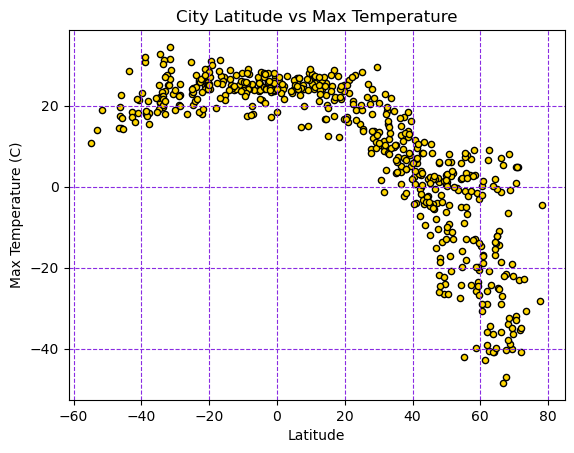

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", color="gold", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(color="blueviolet", linestyle="--")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

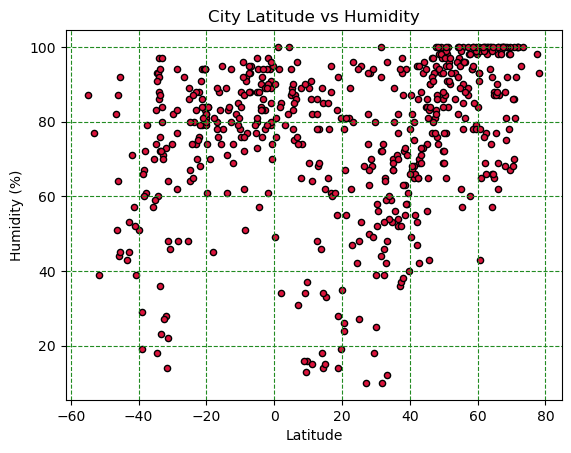

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", color="crimson", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="forestgreen", linestyle="--")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

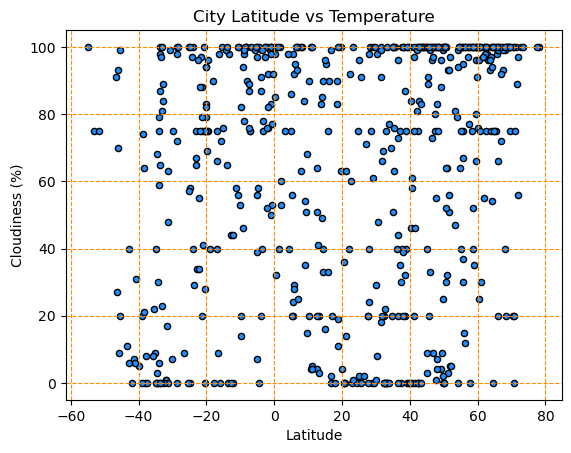

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness", color="dodgerblue", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="darkorange", linestyle="--")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

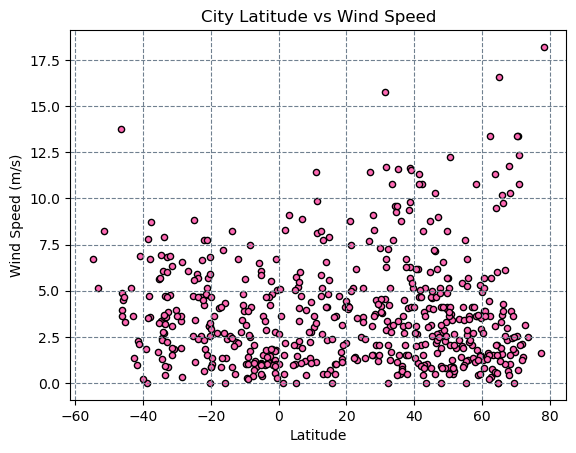

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", color="hotpink", edgecolors= "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(color="slategrey", linestyle="--")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Functions defined below, can use for all regression plots!
# weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(x_column, y_column)
# weather_fit = weather_slope * x_column + weather_int

In [13]:
# Create a DataFrame with the northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margate,51.3813,1.3862,6.06,84,3,0.89,GB,1675725866
1,russell,32.3502,-85.1999,18.78,39,0,0.00,US,1675725867
2,shellbrook,53.2168,-106.4011,-0.43,86,47,3.44,CA,1675725842
3,krasnoarmeysk,51.0239,45.6969,-17.08,98,64,3.42,RU,1675725868
6,lanivtsi,49.8633,26.0908,-6.20,86,99,4.07,UA,1675725869


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,arraial do cabo,-22.9661,-42.0278,25.92,83,75,2.57,BR,1675725868
5,castro,-24.7911,-50.0119,20.13,64,58,1.11,BR,1675725868
9,mataura,-46.1927,168.8643,17.39,64,70,3.94,NZ,1675725870
10,bredasdorp,-34.5322,20.0403,20.67,93,68,1.32,ZA,1675725870
14,ushuaia,-54.8000,-68.3000,10.81,87,100,6.69,AR,1675725775


###  Temperature vs. Latitude Linear Regression Plot

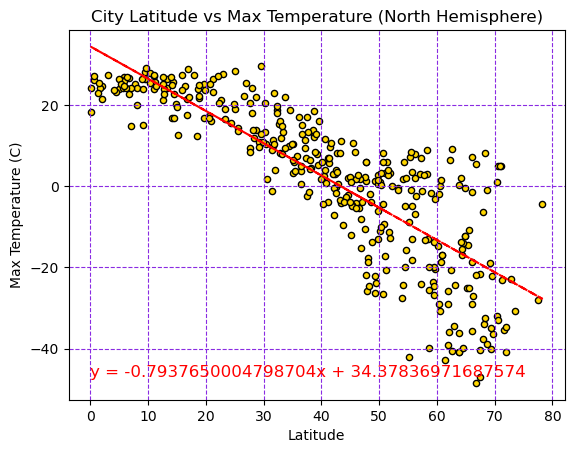

The r-value is: -0.83264


In [15]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot.scatter(x="Lat", y="Max Temp", color="gold", edgecolors= "black")

# Regression Function
north_lat_column = northern_hemi_df["Lat"]
north_temp_column = northern_hemi_df["Max Temp"]
weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(north_lat_column, north_temp_column)
weather_fit = weather_slope * north_lat_column + weather_int
plt.plot(north_lat_column, weather_fit, "--", color="red")

# Style it
plt.title("City Latitude vs Max Temperature (North Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(color="blueviolet", linestyle="--")
line_equation = f"y = {weather_slope}x + {weather_int}"
plt.annotate(line_equation, (0, -47), fontsize=12, color="red")
plt.show()

# Print r-value
print("The r-value is:", round(st.pearsonr(north_lat_column,north_temp_column)[0],5))

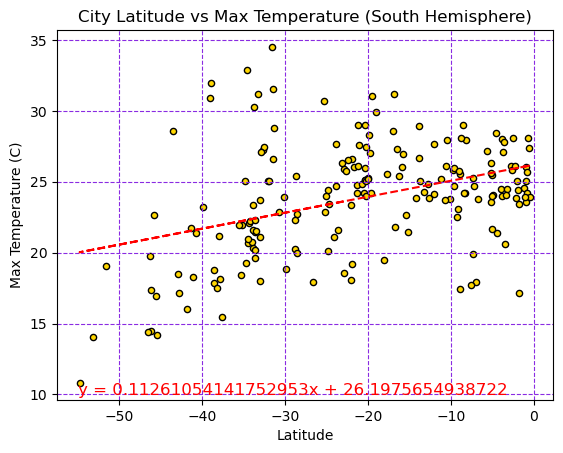

The r-value is: 0.39047


In [16]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot.scatter(x="Lat", y="Max Temp", color="gold", edgecolors= "black")

# Regression Function
south_lat_column = southern_hemi_df["Lat"]
south_temp_column = southern_hemi_df["Max Temp"]
weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(south_lat_column, south_temp_column)
weather_fit = weather_slope * south_lat_column + weather_int
plt.plot(south_lat_column, weather_fit, "--", color="red")

# Style it
plt.title("City Latitude vs Max Temperature (South Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(color="blueviolet", linestyle="--")
line_equation = f"y = {weather_slope}x + {weather_int}"
plt.annotate(line_equation, (-55, 10), fontsize=12, color="red")
plt.show()

# Print r-value
print("The r-value is:", round(st.pearsonr(south_lat_column,south_temp_column)[0],5))

**Discussion about the linear relationship:** These two charts show maximum temperatures rising as they approach the equator at latitude 0. What is also interesting is that there is a sharper slope of temperatures for the northern hemisphere! Temperatures drop more quickly at higher latitudes compared to lower.

### Humidity vs. Latitude Linear Regression Plot

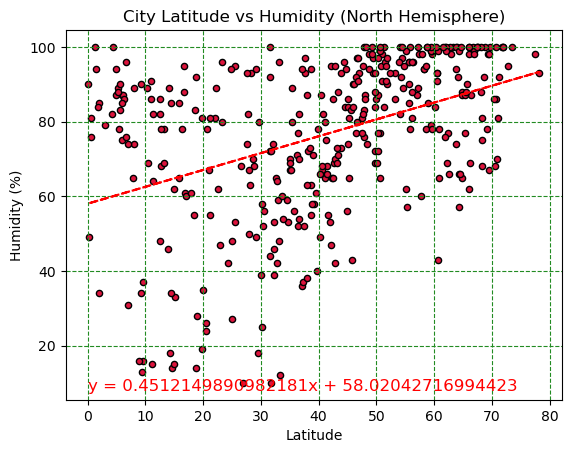

The r-value is: 0.4152


In [17]:
# Build the scatter plots for latitude vs. humidity
northern_hemi_df.plot.scatter(x="Lat", y="Humidity", color="crimson", edgecolors= "black")

# Regression Function
north_lat_column = northern_hemi_df["Lat"]
north_humid_column = northern_hemi_df["Humidity"]
weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(north_lat_column, north_humid_column)
weather_fit = weather_slope * north_lat_column + weather_int
plt.plot(north_lat_column, weather_fit, "--", color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (North Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="forestgreen", linestyle="--")
line_equation = f"y = {weather_slope}x + {weather_int}"
plt.annotate(line_equation, (0, 8), fontsize=12, color="red")
plt.show()

# Print r-value
print("The r-value is:", round(st.pearsonr(north_lat_column,north_humid_column)[0],5))

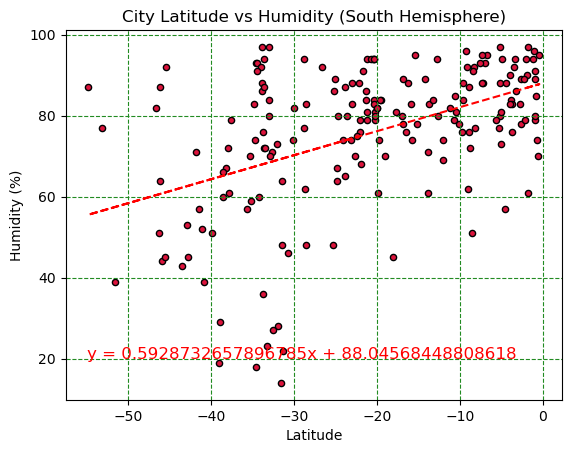

The r-value is: 0.45871


In [18]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity
southern_hemi_df.plot.scatter(x="Lat", y="Humidity", color="crimson", edgecolors= "black")

# Regression Function
south_lat_column = southern_hemi_df["Lat"]
south_humid_column = southern_hemi_df["Humidity"]
weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(south_lat_column, south_humid_column)
weather_fit = weather_slope * south_lat_column + weather_int
plt.plot(south_lat_column, weather_fit, "--", color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (South Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="forestgreen", linestyle="--")
line_equation = f"y = {weather_slope}x + {weather_int}"
plt.annotate(line_equation, (-55, 20), fontsize=12, color="red")
plt.show()

# Print r-value
print("The r-value is:", round(st.pearsonr(south_lat_column,south_humid_column)[0],5))

**Discussion about the linear relationship:** The data suggests that humidity increases as we move to higher latitudes. While there is a fairly wide range across all the data, the regression line indicates lower humidity towards the south and higher to the north.

### Cloudiness vs. Latitude Linear Regression Plot

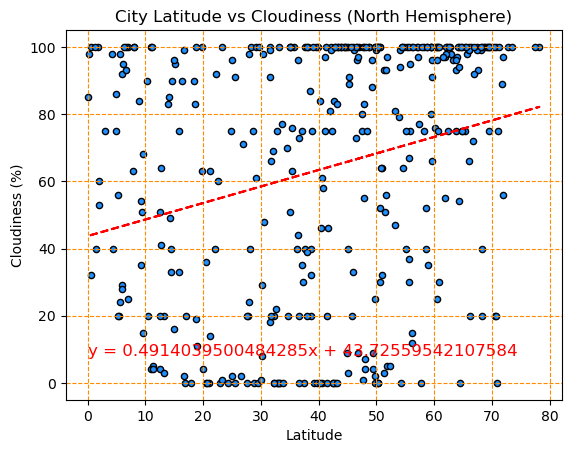

The r-value is: 0.25892


In [19]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
northern_hemi_df.plot.scatter(x="Lat", y="Cloudiness", color="dodgerblue", edgecolors= "black")

# Regression Function
north_lat_column = northern_hemi_df["Lat"]
north_cloud_column = northern_hemi_df["Cloudiness"]
weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(north_lat_column, north_cloud_column)
weather_fit = weather_slope * north_lat_column + weather_int
plt.plot(north_lat_column, weather_fit, "--", color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (North Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="darkorange", linestyle="--")
line_equation = f"y = {weather_slope}x + {weather_int}"
plt.annotate(line_equation, (0, 8), fontsize=12, color="red")
plt.show()

# Print r-value
print("The r-value is:", round(st.pearsonr(north_lat_column,north_cloud_column)[0],5))

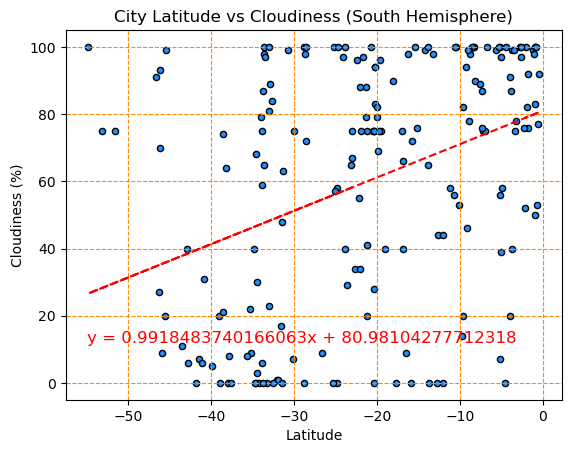

The r-value is: 0.37474


In [20]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
southern_hemi_df.plot.scatter(x="Lat", y="Cloudiness", color="dodgerblue", edgecolors= "black")

# Regression Function
south_lat_column = southern_hemi_df["Lat"]
south_cloud_column = southern_hemi_df["Cloudiness"]
weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(south_lat_column, south_cloud_column)
weather_fit = weather_slope * south_lat_column + weather_int
plt.plot(south_lat_column, weather_fit, "--", color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (South Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="darkorange", linestyle="--")
line_equation = f"y = {weather_slope}x + {weather_int}"
plt.annotate(line_equation, (-55, 12), fontsize=12, color="red")
plt.show()

# Print r-value
print("The r-value is:", round(st.pearsonr(south_lat_column,south_cloud_column)[0],5))

**Discussion about the linear relationship:** Similar to the humidity, we see the data pointing to cloudier weather as we move to higher latitudes. This lines up with the previous findings - higher humidity, more moisture in the air, more clouds!

### Wind Speed vs. Latitude Linear Regression Plot

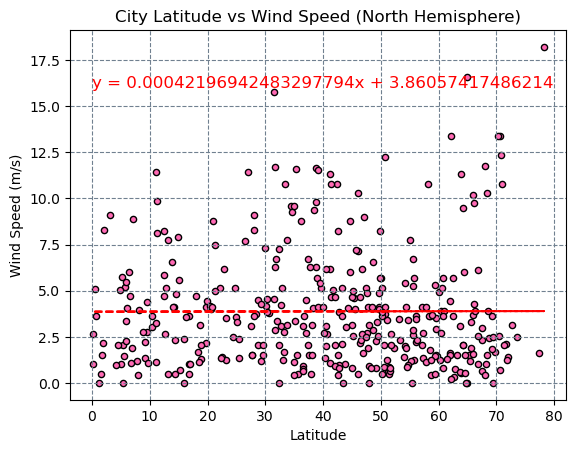

The r-value is: 0.00263


In [21]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
northern_hemi_df.plot.scatter(x="Lat", y="Wind Speed", color="hotpink", edgecolors= "black")

# Regression Function
north_lat_column = northern_hemi_df["Lat"]
north_wind_column = northern_hemi_df["Wind Speed"]
weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(north_lat_column, north_wind_column)
weather_fit = weather_slope * north_lat_column + weather_int
plt.plot(north_lat_column, weather_fit, "--", color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (North Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(color="slategrey", linestyle="--")
line_equation = f"y = {weather_slope}x + {weather_int}"
plt.annotate(line_equation, (0, 16), fontsize=12, color="red")
plt.show()

# Print r-value
print("The r-value is:", round(st.pearsonr(north_lat_column,north_wind_column)[0],5))

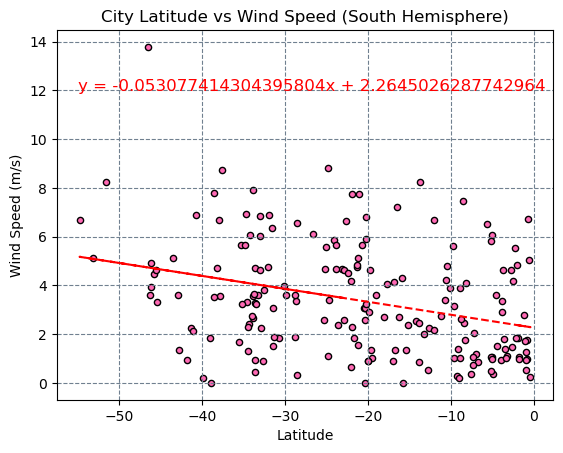

The r-value is: -0.31986


In [22]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
southern_hemi_df.plot.scatter(x="Lat", y="Wind Speed", color="hotpink", edgecolors= "black")

# Regression Function
south_lat_column = southern_hemi_df["Lat"]
south_wind_column = southern_hemi_df["Wind Speed"]
weather_slope, weather_int, weather_r, weather_p, weather_std_err = st.linregress(south_lat_column, south_wind_column)
weather_fit = weather_slope * south_lat_column + weather_int
plt.plot(south_lat_column, weather_fit, "--", color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (South Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(color="slategrey", linestyle="--")
line_equation = f"y = {weather_slope}x + {weather_int}"
plt.annotate(line_equation, (-55, 12), fontsize=12, color="red")
plt.show()

# Print r-value
print("The r-value is:", round(st.pearsonr(south_lat_column,south_wind_column)[0],5))

**Discussion about the linear relationship:** Wind speed is interesting because it does loosely follow the trends above and wind speed does climb as we review the higher latitudes. But where it differs is after it crosses the equator, then the regression stays relatively flat.